In [3]:
from google.colab import files
uploaded = files.upload()

Saving Test_Tom_and_Jerry.mp4 to Test_Tom_and_Jerry.mp4


In [0]:
import cv2 
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import tensorflow as tf
import sklearn
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation

Generating Dataset from video

In [0]:
count = 0
videoFile = "Train_Tom_and_jerry.mp4"
cap = cv2.VideoCapture(videoFile)   # capturing the video from the given path
frameRate = cap.get(5) #frame rate
x=1
while(cap.isOpened()):
    frameId = cap.get(1) #current frame number
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename ="frame%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
cap.release()
# img = plt.imread('frame125.jpg')   # reading image using its name
# plt.imshow(img)

In [0]:
count = 0
videoFile = "Test_Tom_and_Jerry.mp4"
cap = cv2.VideoCapture(videoFile)   # capturing the video from the given path
frameRate = cap.get(5) #frame rate
x=1
while(cap.isOpened()):
    frameId = cap.get(1) #current frame number
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename ="test%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
cap.release()

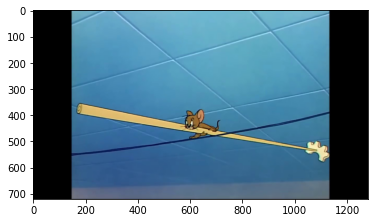

In [7]:
img = plt.imread('test105.jpg')   # reading image using its name
plt.imshow(img)

In [8]:
data = pd.read_csv('mapping.csv')
data.head()
data_emo = pd.read_csv('Train.csv')

data_ans = pd.read_csv('Test.csv')
# data_ans.head()
data_emo.head()

,frame_ID,Emotion
0,frame0.jpg,happy
1,frame1.jpg,happy
2,frame2.jpg,surprised
3,frame3.jpg,surprised
4,frame4.jpg,angry


Data Pre-processing

In [133]:
print(dummy_y_emo[2])

[0. 0. 0. 0. 1.]


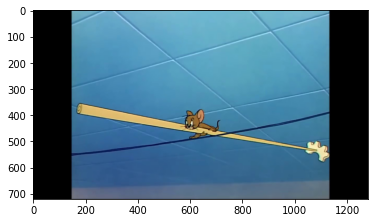

In [126]:
X = []
for img_name in data.Image_ID:
    img = plt.imread(''+ img_name)
    X.append(img)

plt.imshow(X[0])

X_ans = []
for img_name in data_ans.Frame_ID:
    img = plt.imread(''+ img_name)
    X_ans.append(img)

plt.imshow(X_ans[105])

X_emo = [] #list which ignores all unknown cases which will help better learning

(720, 1280, 3)
[[0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 ...
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


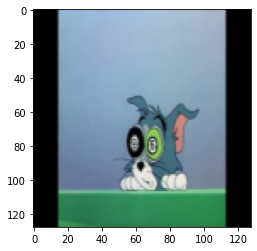

In [127]:
X = np.array(X)
X_ans = np.array(X_ans)

y = data.Class # for identifying tom, jerry or unknown
dummy_y = tf.keras.utils.to_categorical(y) # one hot encoding/ binary encoding

y_emo = data_emo.Emotion
values = np.array(y_emo)  
label_encoder = sklearn.preprocessing.LabelEncoder()
integer_encoded = label_encoder.fit_transform(values) #integer encoding for categorical classes

# print(type(X))
# img = plt.imread(X[0])

print(X[0].shape)
image = []
image_ans = []
for i in range(0,X.shape[0]):
    a = resize(X[i], (128,128))
    image.append(a)

for i in range(0,X_ans.shape[0]):
    a_ans = resize(X_ans[i], (128,128))
    image_ans.append(a_ans)

plt.imshow(image_ans[10])
dummy_y_emo = tf.keras.utils.to_categorical(integer_encoded) #one hot encoding/ binary encoding
# X = np.array(image)
print(dummy_y_emo)

In [39]:
# print('Here in getting unknowns out of my way...')
# X_emo = [X[0]]
# temp_enc = integer_encoded
# # X_train, X_test, Y_train, Y_test = train_test_split(X, dummy_y, test_size=0.3) #split the dataset
# for i in range(X.shape[0]):
#     if temp_enc[i]!=0:
#         np.append(X_emo,X[i])

# for i in range(X.shape[0]):
#     if temp_enc[i]==0:
#         np.delete(temp_enc,i)

# dummy_y_emo = tf.keras.utils.to_categorical(integer_encoded) #one hot encoding/ binary encoding
# X_emo = np.array(X_emo)

Here in getting unknowns out of my way...


In [137]:
# print(X_emo.shape)
# print(range(X.shape[0]))
print(integer_encoded)

[2 2 4 4 1 4 4 4 4 1 1 0 4 4 2 1 4 2 3 3 1 0 0 4 4 4 4 1 4 1 3 3 3 3 2 4 4
 4 0 0 0 2 2 4 4 4 1 3 3 3 4 4 2 4 0 0 2 4 4 4 4 4 2 3 3 2 2 4 4 2 2 4 3 0
 0 0 0 0 2 0 1 1 0 4 2 4 0 4 3 4 4 4 0 4 3 4 0 0 2 2 2 2 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 0 3 3 1 1 4 4 4 0 0 0 3 3 0 1 0 1 0 1 1
 1 1 1 1 0 1 1 0 2 2 0 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 0 0 0 4 4 4 2 2 2 2
 0 0 0 0 2 2 2 2 2 0 0 0 0 0 0 3 3 3 3 3 3 3 3 2 2 2 2 2 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 1 1 1 4 4 1 1 1 1 4 4 1 1 3 3 3 0 0 0 0 3 3 3 4 1 1 0 0
 1 0 1 0 0 0 0 2 0 0 0 4 4 0 0 3 0 0 4 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [129]:
# print(X_emo.shape)
# print(type(X_emo))
# print(dummy_y_emo.shape)
# print(integer_encoded)
print(type(integer_encoded))

<class 'numpy.ndarray'>


(298, 128, 128, 3)
[0. 1. 0.]


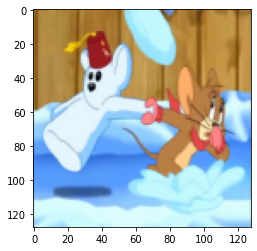

In [130]:
X = np.array(image)
X_ans = np.array(image_ans)
print(X.shape)
X_train, X_test, Y_train, Y_test = train_test_split(X, dummy_y, test_size=0.3, random_state=42) #split the dataset, not necessary to include random_test
# print(Y_train.shape)
print(Y_train[8])
plt.imshow(X_train[8])

# X_temp = X_train/255.
# plt.imshow(X_temp[8])

Building the Model

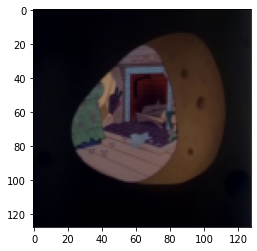

In [44]:
plt.imshow(X_train[0])

In [45]:
print(X_train.shape)
print(Y_train.shape)
# print(X_train[0])

(208, 128, 128, 3)
(208, 3)


MODEL TO TRAIN TO LEARN WHETHER TOM OR JERRY OR UNKNOWN 

In [54]:
# batch_size = 16
# epochs = 5
class_weight = {0: 1.,
                1: 5.,
                2: 10.}
x_train = tf.keras.utils.normalize(X_train, axis=1)
x_test = tf.keras.utils.normalize(X_test, axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(2048, activation=tf.nn.relu))
# model.add(tf.keras.layers.Dense(256, activation=tf.nn.sigmoid))
model.add(tf.keras.layers.Dense(3, activation=tf.nn.softmax)) #use softmax for probability distribution

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
character = model.fit(x_train, Y_train, epochs=100, class_weight=class_weight)
model.summary()

Epoch 1/100
7/7 [==============================] - 0s 44ms/step - loss: 64.6031 - accuracy: 0.3750
Epoch 2/100
7/7 [==============================] - 0s 38ms/step - loss: 24.7774 - accuracy: 0.4279
Epoch 3/100
7/7 [==============================] - 0s 35ms/step - loss: 21.7797 - accuracy: 0.4567
Epoch 4/100
7/7 [==============================] - 0s 34ms/step - loss: 8.7559 - accuracy: 0.5048
Epoch 5/100
7/7 [==============================] - 0s 35ms/step - loss: 9.2709 - accuracy: 0.5144
Epoch 6/100
7/7 [==============================] - 0s 35ms/step - loss: 7.2519 - accuracy: 0.5481
Epoch 7/100
7/7 [==============================] - 0s 35ms/step - loss: 5.1906 - accuracy: 0.5721
Epoch 8/100
7/7 [==============================] - 0s 34ms/step - loss: 1.8646 - accuracy: 0.6779
Epoch 9/100
7/7 [==============================] - 0s 34ms/step - loss: 3.7915 - accuracy: 0.6298
Epoch 10/100
7/7 [==============================] - 0s 35ms/step - loss: 4.1791 - accuracy: 0.6010
Epoch 11/100
7/7

In [0]:
score = model.evaluate(X_test, Y_test)

2


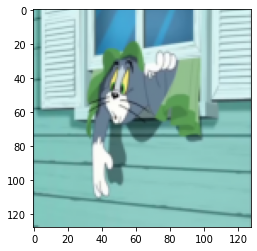

(90, 3)


In [131]:
prediction = model.predict(np.array(x_test))
print(np.argmax(prediction[8]))
plt.imshow(X_test[8])
plt.show()
print(prediction.shape)

In [138]:
X_1, X_test, Y_1, Y_test = train_test_split(X, dummy_y_emo, test_size=0.01) #split the dataset, not necessary to include random_test

# x_train_emo = X_1/255.
# y_test_emo = tf.keras.utils.normalize(X_test, axis=1) already normalized

class_weight = {0: 1.,
                1: 2.,
                2: 2.,
                3: 2.,
                4: 2.}

model_emo = tf.keras.models.Sequential()
model_emo.add(tf.keras.layers.Flatten())
model_emo.add(tf.keras.layers.Dense(2048, activation=tf.nn.relu))
# model.add(tf.keras.layers.Dense(256, activation=tf.nn.sigmoid))
model_emo.add(tf.keras.layers.Dense(5, activation=tf.nn.softmax)) #use softmax for probability distribution

model_emo.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
emotion = model_emo.fit(X_1, Y_1, epochs=300, class_weight=class_weight)
model_emo.summary()

Epoch 1/300
10/10 [==============================] - 0s 44ms/step - loss: 187.9369 - accuracy: 0.2881
Epoch 2/300
10/10 [==============================] - 0s 37ms/step - loss: 102.8512 - accuracy: 0.4407
Epoch 3/300
10/10 [==============================] - 0s 35ms/step - loss: 25.0896 - accuracy: 0.3525
Epoch 4/300
10/10 [==============================] - 0s 36ms/step - loss: 10.1000 - accuracy: 0.5322
Epoch 5/300
10/10 [==============================] - 0s 35ms/step - loss: 7.5555 - accuracy: 0.5254
Epoch 6/300
10/10 [==============================] - 0s 36ms/step - loss: 6.0888 - accuracy: 0.6136
Epoch 7/300
10/10 [==============================] - 0s 35ms/step - loss: 4.4577 - accuracy: 0.5729
Epoch 8/300
10/10 [==============================] - 0s 35ms/step - loss: 6.7684 - accuracy: 0.5017
Epoch 9/300
10/10 [==============================] - 0s 35ms/step - loss: 2.0017 - accuracy: 0.7390
Epoch 10/300
10/10 [==============================] - 0s 35ms/step - loss: 2.0316 - accuracy: 

In [140]:
# x_ans = tf.keras.utils.normalize(X_ans, axis=1)

prediction2 = model_emo.predict(np.array(x_ans))

# count = 0
for i in range(x_ans.shape[0]):
    print(np.argmax(prediction2[i]))
# plt.imshow(X_1[0])

# print(prediction2)

4
0
4
4
0
0
4
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
4
0
4
4
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
4
4
4
4
0
0
2
0
0
0
4
4
4
4
0
0
4
4
4
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
4
0
0
0
0
4
2
2
0
0
0
0
0
0
0
4
0
4
4
0
4
0
0
4
4
4
4
2
2
4
0
0
0
0
4
0
4
4
0
0
0
0
0
0
0


4


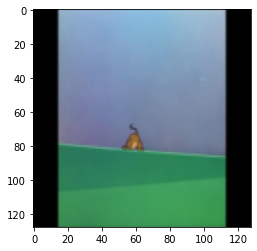

In [146]:
print(np.argmax(prediction2[2]))
plt.imshow(X_ans[2])
# print(prediction2)
# print(count)